Madison McKay
MS 274 Final Project Notebook

Import modules

In [ ]:
# import the modules you will need for this notebook
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc4
import os
import requests
import os
from subscriber import podaac_data_downloader as pdd
from subscriber import podaac_access as pa
import argparse
import datetime as dt
import pandas as pd
import statsmodels.api as sm
from scipy.interpolate import interp1d
import datetime as dt

Download SST

In [3]:
#Dowload SST data to make a time series
# define an output folder, make data path to external hard drive for homework and change dates and times and should be good to go
data_path = 'D:\\ms274\\Final_Project\\SST\\MUR1997-2023'

# define a collection e.g.:
# MUR SST: MUR25-JPL-L4-GLOB-v04.2
# SMAP SSS: SMAP_JPL_L3_SSS_CAP_MONTHLY_V5
short_name = 'MUR25-JPL-L4-GLOB-v04.2'

# define a start time
# must be in this format:
start_date_time = '2017-06-01T00:00:00Z'

# define a start time
# must be in this format:
end_date_time = '2023-09-30T00:00:00Z'

# create a parser object from the 
parser = pdd.create_parser()
args = parser.parse_args(['-c',short_name, '-d',data_path,
                          '-sd',start_date_time, '-ed',end_date_time])

# run the downloading script
pdd.run(args)

In [4]:
# define a path to your raster files folder 
file_folder = 'D:\\ms274\\Final_Project\\SST\\MUR1997-2023'

# make a file path to one of the nc files
file_path = file_folder + '\\' + '20020902090000-JPL-L4_GHRSST-SSTfnd-MUR25-GLOB-v02.0-fv04.2.nc'

# open the file and read in the sea ice variable to a 2D numpy grid. Ds is dataset
ds = nc4.Dataset(file_path)
sst_grid = ds.variables['analysed_sst']
sst_grid = np.array(sst_grid)
ds.close()

# print the minimum and maximum of the grid
print(np.max(sst_grid))
print(np.min(sst_grid))

307.44899999999996
-32768.0


Define a grid for the study area

In [5]:
min_x = -123.732967
max_x = -123.454048
min_y = 38.436170
max_y = 38.596469

ds = nc4.Dataset(file_path)
x_grid = ds.variables['lon']
x_grid = np.array(x_grid)
y_grid = ds.variables['lat']
y_grid = np.array(y_grid)
sst_grid = ds.variables['analysed_sst']
sst_grid = np.array(sst_grid)
ds.close()

min_x_index = np.argmin(np.abs(min_x - x_grid))
max_x_index = np.argmin(np.abs(max_x - x_grid))

min_y_index = np.argmin(np.abs(min_y - y_grid))
max_y_index = np.argmin(np.abs(max_y - y_grid))

print(min_x_index)
print(min_y_index)
print(max_x_index)
print(max_y_index)

225
513
226
514


Make a seasonal timeseries of SST for a defined range of dates

In [8]:
# make a sorted file list of all the sea ice nc files
file_list = []
for file_name in os.listdir(file_folder):
    if file_name[-3:]=='.nc':
        file_list.append(file_name)

# sort the file list
file_list.sort()

# make empty lists called date_list and seaice_values
# to store data from all of the files
print(file_list[0])
print(file_list[-1])

year_list = []
sst_values = []


for yr in range(2002, 2023):
    print('working on year' + str(yr))
    sum=0
    count=0
    min_date = dt.datetime(yr, 12, 1)
    max_date = dt.datetime(yr+1, 2, 28)
# loop through all of the files in the file list
    for file_name in file_list:
        
        
        # make a date string for the file
        file_parts = file_name.split('-')
        year = file_parts[0][0:4]
        month = file_parts[0][4:6]
        day = file_parts[0][6:8]
        date_str = year+'-'+month+'-'+day

        file_date = dt.datetime(int(year),int(month),int(day))

        if file_date >= min_date and file_date < max_date:
            
        
            # open the file to get the seaice grid
            file_path = file_folder + '\\' + file_name
            ds = nc4.Dataset(file_path)
            longitude = np.array(ds.variables['lon'])
            latitude = np.array(ds.variables['lat'])
            sst = np.array(ds.variables['analysed_sst'])
            ds.close()
            sst = sst[0,:,:]
        
         #ssh_masked = np.ma.masked_where(ssh>10000, ssh)
            #print(np.shape(ssh))
            #print(min_y_index,max_y_index,min_x_index,max_x_index)
            sst_grid_subset = sst[min_y_index:max_y_index, min_x_index:max_x_index]
            #print(ssh_grid_subset)
            sst_grid_subset = sst_grid_subset[sst_grid_subset>-100]
            #mean_sst = np.mean(sst_grid_subset)

            sum=sum+np.mean(sst_grid_subset)
            count = count +1

    average = sum/count
    sst_values.append(average)
    year_list.append(yr+1)
            

print(year_list)
print(sst_values)

20020901090000-JPL-L4_GHRSST-SSTfnd-MUR25-GLOB-v02.0-fv04.2.nc
20230929090000-JPL-L4_GHRSST-SSTfnd-MUR25-GLOB-v02.0-fv04.2.nc
working on year2002
working on year2003
working on year2004
working on year2005
working on year2006
working on year2007
working on year2008
working on year2009
working on year2010
working on year2011
working on year2012
working on year2013
working on year2014
working on year2015
working on year2016
working on year2017
working on year2018
working on year2019
working on year2020
working on year2021
working on year2022
[2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
[285.8926629213483, 285.25770786516847, 285.49624719101115, 285.934179775281, 285.02595505617967, 284.08212359550555, 284.7396966292135, 285.1812471910113, 284.7323146067415, 284.3958651685395, 285.32885393258425, 284.95949438202246, 287.7156966292134, 286.3657865168539, 285.31003370786505, 286.3021123595505, 286.252537499999

Convert SST from kelvin to celcius

In [42]:
sst_values_celsius = []

for year in sst_values:
    sst_values_celsius.append(year-273.15)
    print(year-273.15)

print(sst_values_celsius)
    

12.742662921348312
12.107707865168493
12.346247191011173
12.784179775281018
11.875955056179691
10.932123595505573
11.589696629213506
12.031247191011346
11.582314606741534
11.245865168539524
12.178853932584275
11.809494382022478
14.565696629213448
13.215786516853939
12.160033707865068
13.152112359550529
13.102537499999983
12.392215189873468
11.507831168831103
11.871712500000001
11.862750000000062
[12.742662921348312, 12.107707865168493, 12.346247191011173, 12.784179775281018, 11.875955056179691, 10.932123595505573, 11.589696629213506, 12.031247191011346, 11.582314606741534, 11.245865168539524, 12.178853932584275, 11.809494382022478, 14.565696629213448, 13.215786516853939, 12.160033707865068, 13.152112359550529, 13.102537499999983, 12.392215189873468, 11.507831168831103, 11.871712500000001, 11.862750000000062]


Output as a CSV

In [45]:
sst_timeseries_interpolated = np.column_stack([year_list, sst_values_celsius])

# define an output folder
output_folder = 'C:\\Users\\maddi\\Documents\\ms274FinalProject\\ms274_BullKelp_Project\\Notebooks'

# output the interpolated wind file
np.savetxt(output_folder+'\\sst_final_timeseries.csv', sst_timeseries_interpolated, delimiter=',')



To print the shape of the grid:

In [13]:
# print the shape of the SST grid 
print(np.shape(sst_grid))

# take only the "first timestep" of the SST grid... aka removing it
sst_grid = sst_grid[0, :, :]

# subset the grid and find the area of sea ice in the subset
sst_grid_subset = sst_grid[min_y_index:max_y_index, min_x_index:max_x_index]

# print the shape of the seaice grid
print(np.shape(sst_grid_subset))

(1, 720, 1440)
(4, 0)


For converting to decimal years:

In [14]:
def YMD_to_DecYr(year, month, day):
    
    # define a date object using the datetime module
    date = dt.datetime(year, month, day)

    # define the start in ordinal units (days since ...)
    start = dt.date(year, 1,1).toordinal()

    # compute the year_length in ordinal units (365 or 366)
    year_length = dt.date(year+1,1,1).toordinal() - start

    # compute the fraction based on the date
    decimal_fraction = (date.toordinal() - start) / year_length

    # compute the decimal year
    decimal_year = year + decimal_fraction
    
    #return
    return(decimal_year)

In [17]:
# make an empty list for the decimal years
decyrs = []

# loop through the sept date values and fill in the decimal years list
for date in date_array:
    datetime_date = date.astype(dt.datetime)
    yr = datetime_date.year
    mo = datetime_date.month
    dy = datetime_date.day
    dec_yr = YMD_to_DecYr(yr, mo, dy)
    decyrs.append(dec_yr)

decyrs = np.array(decyrs)

Import fall kelp canopy area CSV

In [3]:
# define a path to the timeseries folder
timeseries_folder = 'C:\\Users\\maddi\\Documents\\ms274FinalProject\\ms274_BullKelp_Project\\Notebooks'

# read in the SST timeseries
kelp_timeseries = np.genfromtxt(timeseries_folder+'\\'+'kelp_final_timeseries.csv', delimiter=',')

In [110]:
print('Kelp Shape:', np.shape(kelp_timeseries))

Kelp Shape: (21, 2)


Plotting kelp timeseries:

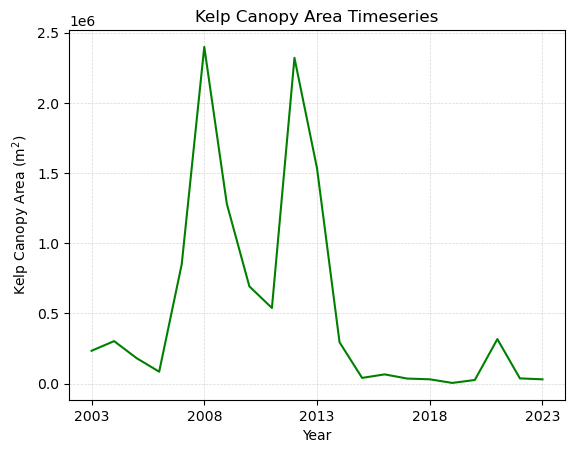

In [113]:
plt.plot(kelp_timeseries[:,0], kelp_timeseries[:,1], color='green')
plt.ylabel('Kelp Canopy Area (m$^2$)')
plt.xlabel('Year')
plt.title('Kelp Canopy Area Timeseries')
plt.grid(linestyle='--', linewidth=0.5, alpha=0.5)
plt.gca().set_xticks(np.arange(2003, 2025, 5))
plt.show()

Analyzing chl a data

In [23]:
# define a path to your raster files folder 
file_folder_chl = 'D:\\ms274\\Final_Project\\Chlorophyll\\2002-2023 Chl Data'

# make a file path to one of the nc files
file_path_chl = file_folder_chl + '\\' + 'AQUA_MODIS.20230401.L3m.DAY.CHL.chlor_a.4km.nc'

# open the file and read in the sea ice variable to a 2D numpy grid. Ds is dataset
#ds_chl = nc4.Dataset(file_path_chl)
#chl_grid = ds.variables['chlor_a']
#chl_grid = np.array(chl_grid)
#ds.close()

# print the minimum and maximum of the grid
#print(np.max(chl_grid))
#print(np.min(chl_grid))

Creating grid for chl a data:

In [28]:
min_x_chl = -123.732967
max_x_chl = -123.454048
min_y_chl = 38.436170
max_y_chl = 38.596469

ds_chl = nc4.Dataset(file_path_chl)
x_grid_chl = ds.variables['lon']
x_grid_chl = np.array(x_grid_chl)
y_grid_chl = ds.variables['lat']
y_grid_chl = np.array(y_grid_chl)
chl_grid = ds.variables['chlor_a']
chl_grid = np.array(chl_grid)
ds_chl.close()

min_x_index_chl = np.argmin(np.abs(min_x_chl - x_grid_chl))
max_x_index_chl = np.argmin(np.abs(max_x_chl - x_grid_chl))

min_y_index_chl = np.argmin(np.abs(max_y_chl - y_grid_chl))
max_y_index_chl = np.argmin(np.abs(min_y_chl - y_grid_chl))

print(min_x_index_chl)
print(min_y_index_chl)
print(max_x_index_chl)
print(max_y_index_chl)

1350
1233
1357
1237


Create a seasonal timeseries of chlorophyll a data for defined date range

In [35]:
# make a sorted file list of all the sea ice nc files
file_list_chl = []
for file_name in os.listdir(file_folder_chl):
    if file_name[-3:]=='.nc':
        file_list_chl.append(file_name)

# sort the file list
file_list_chl.sort()

# make empty lists called date_list and seaice_values
# to store data from all of the files
print(file_list_chl[0])
print(file_list_chl[-1])

year_list_chl = []
chl_values = []


for yr in range(2002, 2023):
    print('working on year' + str(yr))
    sum=0
    count=0
    min_date = dt.datetime(yr, 12, 1)
    max_date = dt.datetime(yr+1, 2, 28)
# loop through all of the files in the file list
    file_counter = 0
    for file_name in file_list_chl:
        
        
        # make a date string for the file
        file_parts = file_name.split('.')
        year = file_parts[1][0:4]
        month = file_parts[1][4:6]
        day = file_parts[1][6:8]
        date_str = year+'-'+month+'-'+day

        file_date = dt.datetime(int(year),int(month),int(day))

        if file_date >= min_date and file_date < max_date:
            if file_counter <400:
                file_counter+=1

                #print(file_name)
        
                # open the file to get the seaice grid
                file_path_chl = file_folder_chl + '\\' + file_name
                ds = nc4.Dataset(file_path_chl)
                longitude = np.array(ds.variables['lon'])
                latitude = np.array(ds.variables['lat'])
                chl = np.array(ds.variables['chlor_a'])
                ds.close()
                #chl = chl[0,:,:]
            
             #ssh_masked = np.ma.masked_where(ssh>10000, ssh)
                #print(np.shape(ssh))
                #print(min_y_index,max_y_index,min_x_index,max_x_index)
                chl_grid_subset = chl[min_y_index_chl:max_y_index_chl, min_x_index_chl:max_x_index_chl]
                #print(chl_grid_subset)
                #print(ssh_grid_subset)
                chl_grid_subset = chl_grid_subset[chl_grid_subset>-100]
                #mean_sst = np.mean(sst_grid_subset)
                if len(chl_grid_subset) >0:
                    sum=sum+np.mean(chl_grid_subset)
                    count = count +1

    average = sum/count
    chl_values.append(average)
    year_list_chl.append(yr+1)
            #date_list.append(date_str)
            #sst_values.append(sst_grid_subset)
            # compute the total area of seaice in this grid
            #seaice_value_filtered = seaice_grid[seaice_grid <= 1]
            #seaice_area_per_grid_point = seaice_value_filtered * 25 * 25
            #total_seaice_area = np.sum(seaice_area_per_grid_point)
        
            # if the sea ice area value is valid (>0), add the date to the date list
            # and the value to the value list 


# make a date_array from the date_list


print(year_list_chl)
print(chl_values)

AQUA_MODIS.20021001.L3m.DAY.CHL.chlor_a.4km.nc
AQUA_MODIS.20230401.L3m.DAY.CHL.chlor_a.4km.nc
working on year2002
working on year2003
working on year2004
working on year2005
working on year2006
working on year2007
working on year2008
working on year2009
working on year2010
working on year2011
working on year2012
working on year2013
working on year2014
working on year2015
working on year2016
working on year2017
working on year2018
working on year2019
working on year2020
working on year2021
working on year2022
[2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
[1.196330742444843, 1.071895464774101, 3.0580466437865708, 1.4168867482695469, 1.7002351778118234, 1.1385059366303105, 0.7909323975097301, 1.025399136543274, 1.451865033166749, 0.9752235543727875, 1.1365060613913969, 1.2796731382608413, 1.514052120287244, 2.009849037868636, 1.7123201063701086, 1.7757374041892113, 0.9670196732177454, 0.9512923921263495, 1.18

Output chl a data as CSV

In [38]:
chl_timeseries_interpolated = np.column_stack([year_list_chl, chl_values])

# define an output folder
output_folder = 'C:\\Users\\maddi\\Documents\\ms274FinalProject\\ms274_BullKelp_Project\\Notebooks'

# output the interpolated wind file
np.savetxt(output_folder+'\\chl_final_timeseries.csv', chl_timeseries_interpolated, delimiter=',')


Make a timeseries of SST:

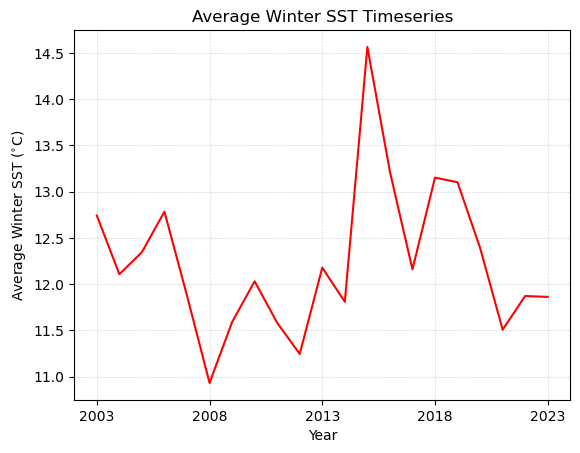

In [4]:
# define a path to the timeseries folder
timeseries_folder = 'C:\\Users\\maddi\\Documents\\ms274FinalProject\\ms274_BullKelp_Project\\Notebooks'

# read in the SST timeseries
sst_timeseries = np.genfromtxt(timeseries_folder+'\\'+'sst_final_timeseries.csv', delimiter=',')

plt.plot(sst_timeseries[:,0], sst_timeseries[:,1], color='red')
plt.ylabel('Average Winter SST ($^{\circ}$C)')
plt.xlabel('Year')
plt.title('Average Winter SST Timeseries')
plt.grid(linestyle='--', linewidth=0.5, alpha=0.5)
plt.gca().set_xticks(np.arange(2003, 2025, 5))
plt.show()

Make a timeseries for chl a data:

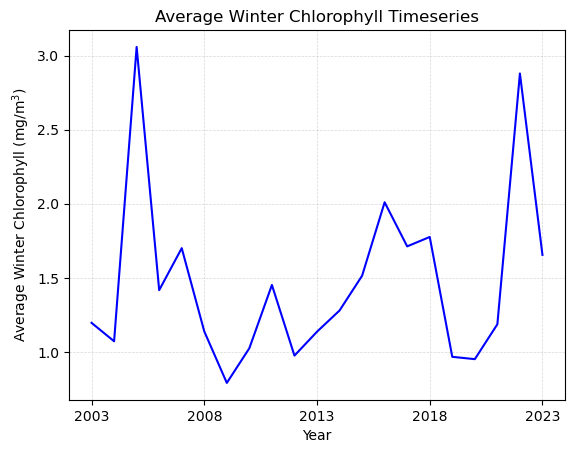

In [5]:
# define a path to the timeseries folder
timeseries_folder = 'C:\\Users\\maddi\\Documents\\ms274FinalProject\\ms274_BullKelp_Project\\Notebooks'

# read in the SST timeseries
sst_timeseries = np.genfromtxt(timeseries_folder+'\\'+'chl_final_timeseries.csv', delimiter=',')

plt.plot(sst_timeseries[:,0], sst_timeseries[:,1], color='blue')
plt.ylabel('Average Winter Chlorophyll (mg/m$^3$)')
plt.xlabel('Year')
plt.title('Average Winter Chlorophyll Timeseries')
plt.grid(linestyle='--', linewidth=0.5, alpha=0.5)
plt.gca().set_xticks(np.arange(2003, 2025, 5))
plt.show()

Multiple Linear Regression

In [7]:
timeseries_folder = 'C:\\Users\\maddi\\Documents\\ms274FinalProject\\ms274_BullKelp_Project\\Notebooks'

# read in the SST timeseries
kelp_timeseries = np.genfromtxt(timeseries_folder+'\\'+'kelp_final_timeseries.csv', delimiter=',')

# read in the wind timeseries
sst_timeseries = np.genfromtxt(timeseries_folder+'\\'+'sst_final_timeseries.csv', delimiter=',')

# read in the chlorophyll timeseries
chl_timeseries = np.genfromtxt(timeseries_folder+'\\'+'chl_final_timeseries.csv', delimiter=',')

In [82]:
# form the X variable
X = np.column_stack([np.ones_like(sst_timeseries[:,1]), 
                     sst_timeseries[:,1], 
                     chl_timeseries[:,1]])

# form the y variable - reshape it just in case
y = kelp_timeseries[:,1]
y= np.reshape(y, (len(y), 1))
print(np.shape(y))
print(np.shape(X))

(21, 1)
(21, 3)


In [83]:
# use the statsmodel OLS function to create a model
# and compute the fit
model = sm.OLS(y, X).fit()


In [84]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                  0.388
Method:                 Least Squares   F-statistic:                     7.333
Date:                Wed, 06 Dec 2023   Prob (F-statistic):            0.00468
Time:                        11:55:46   Log-Likelihood:                -306.81
No. Observations:                  21   AIC:                             619.6
Df Residuals:                      18   BIC:                             622.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.232e+06   1.95e+06      3.713      0.002    3.14e+06    1.13e+07
x1         -5.018e+05   1.61e+05     -3.120      0.006    -8.4e+05   -1.64e+05
x2         -3.745e+05   2.21e+05     -1.696      0.107   -8.39e+05    8.95e+04
==============================================================================
Omnibus:                        2.431   Durbin-Watson:                   1.651
Prob(Omnibus):                  0.297   Jarque-Bera (JB):                2.010
Skew:                           0.711   Prob(JB):                        0.366
Kurtosis:                       2.474   Cond. No.                         192.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Plotting the multiple linear regression:

In [85]:
# retrieve the coefficients from the model.params attribute
coefficients = model.params
print(coefficients)

# store the coefficients into individual variables
intercept = coefficients[0]
slope_sst = coefficients[1]
slope_chl = coefficients[2]


# retrieve the R^2 value from the models.rsquared attribute
r2 = model.rsquared

# compute the modeled values
modeled_values = slope_sst * sst_timeseries[:,1] + slope_chl * chl_timeseries[:,1] + intercept


[7231564.07417426 -501775.33611778 -374547.15098225]


(-750000.0, 2500000.0)

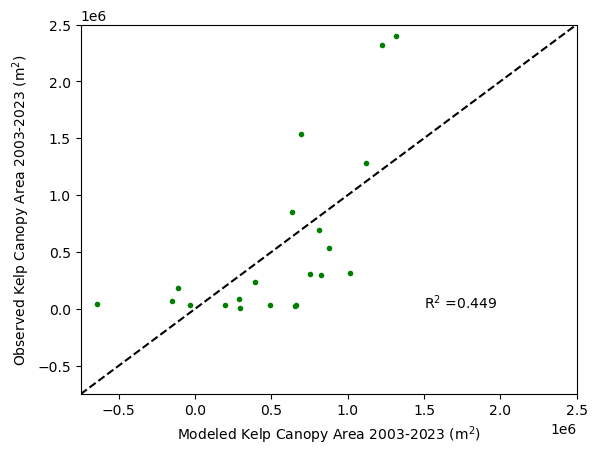

In [135]:
# plot the modeled vs observed values
plt.plot(modeled_values, kelp_timeseries[:,1], 'g.')

# label the x and y axis
plt.xlabel('Modeled Kelp Canopy Area 2003-2023 (m$^2$)')
plt.ylabel('Observed Kelp Canopy Area 2003-2023 (m$^2$)')

# add a label for the R^2
plt.text(1500000, 0, 'R$^2$ =' +'{:.3f}'.format(r2))

# plot the 1-1 line
plt.plot([-750000, 2500000], [-750000, 2500000], 'k--')

# make the axes equal
plt.gca().set_xlim([-750000, 2500000])
plt.gca().set_ylim([-750000, 2500000])

# show the plot

### Multiple linear regression from 2002-2013

In [136]:
# form the X variable
X_subset = np.column_stack([np.ones_like(sst_timeseries[:,1][0:10]), 
                     sst_timeseries[:,1][0:10], 
                     chl_timeseries[:,1][0:10]])

# form the y variable - reshape it just in case
y_subset = kelp_timeseries[:,1][0:10]
y_subset= np.reshape(y_subset, (len(y_subset), 1))
print(np.shape(y_subset))
print(np.shape(X_subset))

# use the statsmodel OLS function to create a model
# and compute the fit
model_subset = sm.OLS(y_subset, X_subset).fit()

model_subset.summary()

(10, 1)
(10, 3)


C:\Users\maddi\miniconda3\envs\ms274\lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     14.28
Date:                Wed, 06 Dec 2023   Prob (F-statistic):            0.00338
Time:                        18:21:05   Log-Likelihood:                -142.12
No. Observations:                  10   AIC:                             290.2
Df Residuals:                       7   BIC:                             291.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.528e+07    2.9e+06      5.274      0.001    8.43e+06    2.21e+07
x1         -1.186e+06    2.5e+05     -4.737      0.002   -1.78e+06   -5.94e+05
x2         -1.804e+05   2.35e+05     -0.767      0.468   -7.37e+05    3.76e+05
==============================================================================
Omnibus:                        1.216   Durbin-Watson:                   2.457
Prob(Omnibus):                  0.545   Jarque-Bera (JB):                0.562
Skew:                          -0.557   Prob(JB):                        0.755
Kurtosis:                       2.676   Cond. No.                         258.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Plotting multiple linear regression:

In [137]:
# retrieve the coefficients from the model.params attribute
coefficients_subset = model_subset.params
print(coefficients_subset)

# store the coefficients into individual variables
intercept_subset = coefficients_subset[0]
slope_sst_subset = coefficients_subset[1]
slope_chl_subset = coefficients_subset[2]


# retrieve the R^2 value from the models.rsquared attribute
r2_subset = model_subset.rsquared

# compute the modeled values
modeled_values_subset = slope_sst_subset * sst_timeseries[:,1][0:11] + slope_chl_subset * chl_timeseries[:,1][0:11] + intercept_subset


[15280602.75533808 -1186066.72718321  -180418.46313891]


(0.0, 2500000.0)

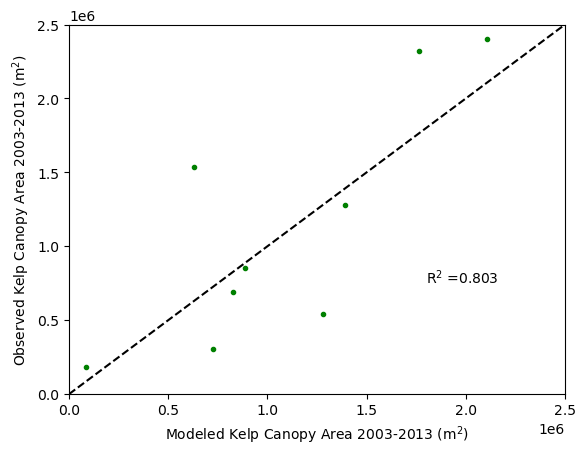

In [139]:
# plot the modeled vs observed values
plt.plot(modeled_values_subset, kelp_timeseries[:,1][0:11], 'g.')

# label the x and y axis
plt.xlabel('Modeled Kelp Canopy Area 2003-2013 (m$^2$)')
plt.ylabel('Observed Kelp Canopy Area 2003-2013 (m$^2$)')

# add a label for the R^2
plt.text(1800000, 750000, 'R$^2$ =' +'{:.3f}'.format(r2_subset))

# plot the 1-1 line
plt.plot([0, 2500000], [0, 2500000], 'k--')

# make the axes equal
plt.gca().set_xlim([0, 2500000])
plt.gca().set_ylim([0, 2500000])

# show the plot



Correlations of all years

In [59]:
# compute the correlation of temp with chl - correlation with itself, correlation with sst and chl, correlation of chl with itself
R = np.corrcoef(sst_timeseries[:,1], kelp_timeseries[:,1])
#print(R)
r = R[0,1]
r2_sst_kelp = r**2
#print(r)
print(r2_sst_kelp)

# compute the correlation of temp with chl
R = np.corrcoef(chl_timeseries[:,1], kelp_timeseries[:,1])
#print(R)
r = R[0,1]
r2_chl_kelp = r**2
#print(r)
print(r2_chl_kelp)


0.36096577336732116
0.15100401857294793


In [63]:
print(kelp_timeseries[:,1][0:12])

[ 233976.  302923.  181327.   84924.  850790. 2399184. 1281143.  693111.
  538965. 2321117. 1535446.  294711.]


In [131]:
# compute the correlation of temp with chl - correlation with itself, correlation with sst and chl, correlation of chl with itself
R = np.corrcoef(sst_timeseries[:,1][0:10], kelp_timeseries[:,1][0:10])
#print(R)
r = R[0,1]
r2_sst_kelp_subset = r**2
#print(r)
print(r2_sst_kelp_subset)

# compute the correlation of temp with chl
R = np.corrcoef(chl_timeseries[:,1][0:10], kelp_timeseries[:,1][0:10])
#print(R)
r = R[0,1]
r2_chl_kelp_subset = r**2
#print(r)
print(r2_chl_kelp_subset)


0.786631856180257
0.17230872266741792


In [35]:
Plotting correlations:

SyntaxError: invalid syntax (4219841467.py, line 1)

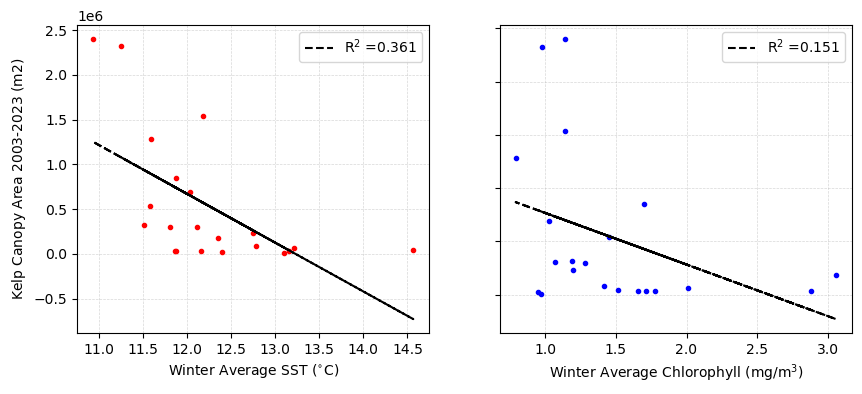

In [105]:
p_sst = np.polyfit(sst_timeseries[:,1], kelp_timeseries[:,1], 1)
#print(p)

# compute the line for wind
p_chl = np.polyfit(chl_timeseries[:,1], kelp_timeseries[:,1], 1)
#print(p)

# make two figures (left and right) for chl vs temp, and chl vs wind
fig = plt.figure(figsize=(10, 4))

plt.subplot(1,2,1)
plt.plot(sst_timeseries[:,1], kelp_timeseries[:,1], 'r.')
plt.plot(sst_timeseries[:,1], p_sst[0]*sst_timeseries[:,1]+p_sst[1], 'k--', label='R$^2$ ='+str(round(r2_sst_kelp,3)))
plt.ylabel('Kelp Canopy Area 2003-2023 (m$2$)')
plt.xlabel('Winter Average SST ($^{\circ}$C)')
plt.grid(linestyle='--', linewidth=0.5, alpha=0.5)
plt.legend()

# make the subplot for the Wind timeseries
plt.subplot(1,2,2)
plt.plot(chl_timeseries[:,1], kelp_timeseries[:,1], 'b.')
plt.plot(chl_timeseries[:,1], p_chl[0]*chl_timeseries[:,1]+p_chl[1], 'k--', label='R$^2$ ='+str(round(r2_chl_kelp,3)))
plt.xlabel('Winter Average Chlorophyll (mg/m$^3$)')
plt.gca().set_yticklabels([])
plt.grid(linestyle='--', linewidth=0.5, alpha=0.5)
plt.legend()

plt.show()

Plotting a subset of the correlations:

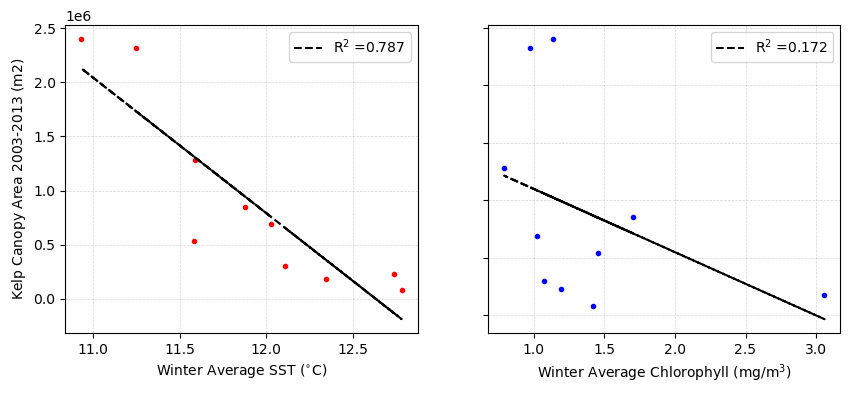

In [133]:
p_sst_subset = np.polyfit(sst_timeseries[:,1][0:10], kelp_timeseries[:,1][0:10], 1)
#print(p)

# compute the line for wind
p_chl_subset = np.polyfit(chl_timeseries[:,1][0:10], kelp_timeseries[:,1][0:10], 1)
#print(p)

# make two figures (left and right) for chl vs temp, and chl vs wind
fig = plt.figure(figsize=(10, 4))

plt.subplot(1,2,1)
plt.plot(sst_timeseries[:,1][0:10], kelp_timeseries[:,1][0:10], 'r.')
plt.plot(sst_timeseries[:,1][0:10], p_sst_subset[0]*sst_timeseries[:,1][0:10]+p_sst_subset[1], 'k--', label='R$^2$ ='+str(round(r2_sst_kelp_subset,3)))
plt.ylabel('Kelp Canopy Area 2003-2013 (m$2$)')
plt.xlabel('Winter Average SST ($^{\circ}$C)')
plt.grid(linestyle='--', linewidth=0.5, alpha=0.5)
plt.legend()

# make the subplot for the Wind timeseries
plt.subplot(1,2,2)
plt.plot(chl_timeseries[:,1][0:10], kelp_timeseries[:,1][0:10], 'b.')
plt.plot(chl_timeseries[:,1][0:10], p_chl_subset[0]*chl_timeseries[:,1][0:10]+p_chl_subset[1], 'k--', label='R$^2$ ='+str(round(r2_chl_kelp_subset,3)))
plt.xlabel('Winter Average Chlorophyll (mg/m$^3$)')
plt.gca().set_yticklabels([])
plt.grid(linestyle='--', linewidth=0.5, alpha=0.5)
plt.legend()

plt.show()

Plotting all timeseries together:

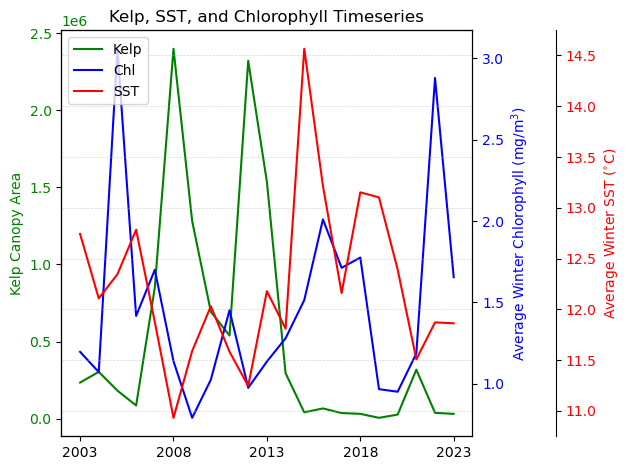

In [123]:
# read in the SST timeseries
kelp_timeseries = np.genfromtxt(timeseries_folder+'\\'+'kelp_final_timeseries.csv', delimiter=',')

# read in the wind timeseries
sst_timeseries = np.genfromtxt(timeseries_folder+'\\'+'sst_final_timeseries.csv', delimiter=',')

# read in the chlorophyll timeseries
chl_timeseries = np.genfromtxt(timeseries_folder+'\\'+'chl_final_timeseries.csv', delimiter=',')

# Create a figure and axis
fig, ax1 = plt.subplots()

# Plot the first variable on the first y-axis
ax1.plot(kelp_timeseries[:, 0], kelp_timeseries[:, 1], color='green', label='Kelp')
ax1.set_ylabel('Kelp Canopy Area', color='green')
ax1.tick_params(axis='y', labelcolor='green')

# Create the second y-axis and plot the second variable
ax2 = ax1.twinx()
ax2.plot(chl_timeseries[:, 0], chl_timeseries[:, 1], color='blue', label='Chl')
ax2.set_ylabel('Average Winter Chlorophyll (mg/m$^3$)', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# Create the third y-axis and plot the third variable
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))  # Adjust the position of the third y-axis
ax3.plot(sst_timeseries[:, 0], sst_timeseries[:, 1], color='red', label='SST')
ax3.set_ylabel('Average Winter SST ($^{\circ}$C)', color='red')
ax3.tick_params(axis='y', labelcolor='red')

# Set common labels
plt.xlabel('Year')
plt.title('Kelp, SST, and Chlorophyll Timeseries')

# Add a legend to differentiate between the variables
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines3, labels3 = ax3.get_legend_handles_labels()
ax3.legend(lines + lines2 + lines3, labels + labels2 + labels3, loc='upper left')

# Adjust layout
fig.tight_layout()

plt.grid(linestyle='--', linewidth=0.5, alpha=0.5)
plt.gca().set_xticks(np.arange(2003, 2025, 5))
plt.show()

Plotting all timeseries together:

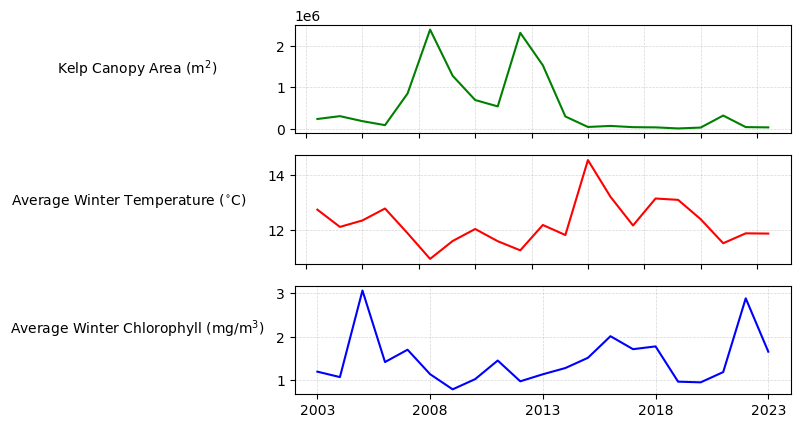

In [34]:
#plt.title('Kelp, SST, and Chlorophyll Timeseries')
plt.subplot(3,1,1)
plt.plot(kelp_timeseries[:,0], kelp_timeseries[:,1], color='green')
plt.ylabel('Kelp Canopy Area (m$^2$)', rotation='horizontal', labelpad=100)
plt.grid(linestyle='--', linewidth=0.5, alpha=0.5)
plt.gca().set_xticklabels([])

# make the subplot for the Wind timeseries
plt.subplot(3,1,2)
plt.plot(sst_timeseries[:,0], sst_timeseries[:,1], color='red')
plt.ylabel('Average Winter Temperature ($^{\circ}$C)', rotation='horizontal', labelpad=100)
plt.grid(linestyle='--', linewidth=0.5, alpha=0.5)
plt.gca().set_xticklabels([])

# make the subplot for the Chlorophyll timeseries
plt.subplot(3,1,3)
plt.plot(chl_timeseries[:,0], chl_timeseries[:,1], color='blue')
plt.ylabel('Average Winter Chlorophyll (mg/m$^3$)', rotation='horizontal', labelpad=100)
plt.grid(linestyle='--', linewidth=0.5, alpha=0.5)

#plt.xlabel('Year')
plt.gca().set_xticks(np.arange(2003, 2025, 5)) 


# show the plot
plt.show()